In [1]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline   
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.cluster import AgglomerativeClustering 
import kneed
from kneed import KneeLocator

In [3]:
data = pd.read_csv( 'CRM-Project-Noorbehbahani-Dataset.csv' )

In [4]:
data = data.fillna(0)

In [5]:
data.drop('id', inplace=True, axis=1)

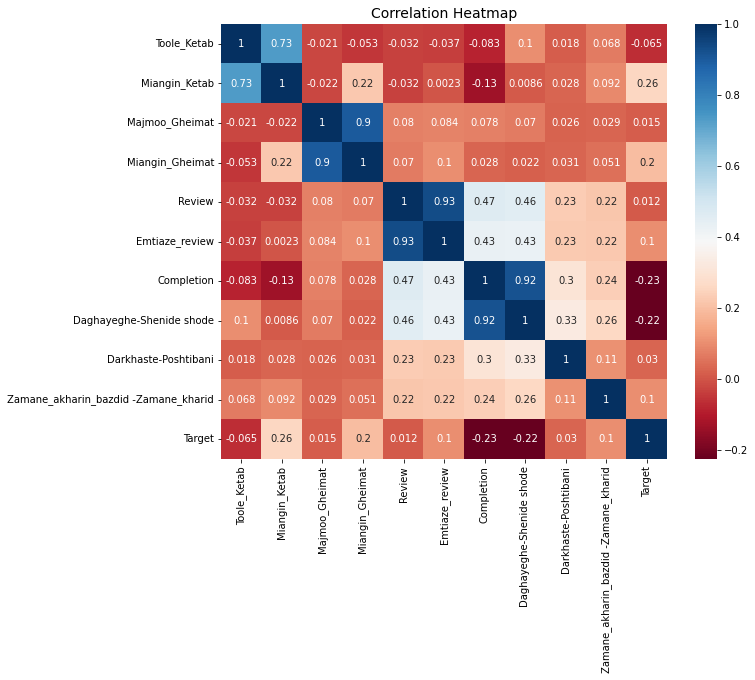

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [7]:
data.drop('Emtiaze_review', inplace=True, axis=1)
data.drop('Miangin_Gheimat', inplace=True, axis=1)
data.drop('Miangin_Ketab', inplace=True, axis=1)
data.drop('Daghayeghe-Shenide shode', inplace=True, axis=1)

In [8]:
 
df = data.copy()

In [9]:

scaler = StandardScaler()
scaler.fit(df)
data_scaled = scaler.transform(df)
data_scaled[0]

array([ 0.05694432,  2.56031917,  2.28491752,  3.58354763, 10.44134984,
        0.34085525, -0.43453904])

In [10]:
pca = PCA()
pca.fit(data_scaled)
features = range(pca.n_components_)
data_pca = pca.transform(data_scaled)
pca.explained_variance_ratio_

array([0.26250693, 0.16068242, 0.15038996, 0.13967005, 0.1241834 ,
       0.10005548, 0.06251175])

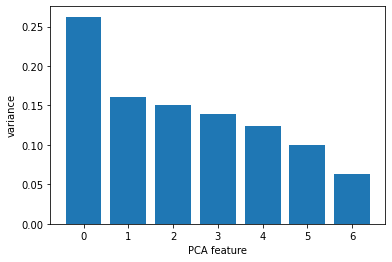

In [11]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [12]:
# Principal component analysis (PCA) and singular value decomposition (SVD) 
# PCA and SVD are closely related approaches and can be both applied to decompose any rectangular matrices.
pca2 = PCA(n_components=2, svd_solver='full')
# fit PCA
pca2.fit(data_scaled)
# PCA transformed data
data_pca2 = pca2.transform(data_scaled)
print(data_pca2.shape)

(14084, 2)


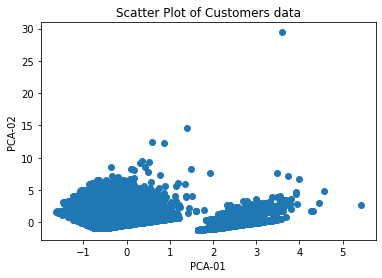

In [13]:
xs = data_pca2[:,0]
ys = data_pca2[:,1]
plt.scatter(ys, xs)

plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

In [14]:
#  finding elbow value for different number of clusters.
X = data_pca2
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++',random_state= 42 ) )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)  

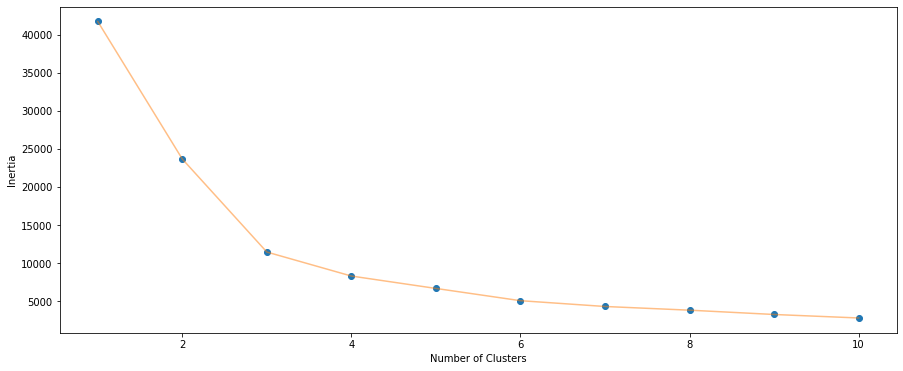

In [15]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [16]:
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing" )

In [17]:

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [18]:
# to determine best k
kl.elbow

3

In [19]:
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05)

In [20]:
hc= AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  

In [21]:
# Build pipeline
pipeline = make_pipeline(scaler, pca2, kmeans)
# fit the model to the scaled dataset
model_fit = pipeline.fit(df)
model_fit

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2, svd_solver='full')),
                ('kmeans', KMeans(n_clusters=3, random_state=0))])

In [22]:
# return a label for each data point based on their cluster
labels = model_fit.predict(df)
df['Clusters'] = labels

In [23]:
# Number of data points for each feature in each cluster
df.groupby('Clusters').count()

,Toole_Ketab,Majmoo_Gheimat,Review,Completion,Darkhaste-Poshtibani,Zamane_akharin_bazdid -Zamane_kharid,Target
Clusters,,,,,,,
0,9548,9548,9548,9548,9548,9548,9548
1,2280,2280,2280,2280,2280,2280,2280
2,2256,2256,2256,2256,2256,2256,2256


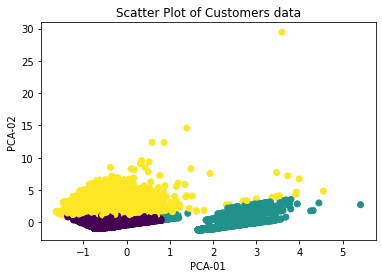

In [24]:
# Scatter plot visuals with labels

xs = data_pca2[:,0]
ys = data_pca2[:,1]
#zs = train_X.iloc[:,2]
plt.scatter(ys, xs,c=labels)
#plt.scatter(ys, zs, c=labels)

plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

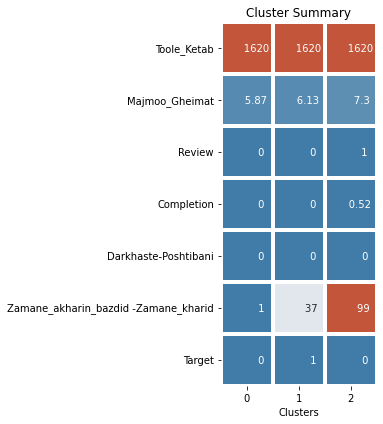

In [29]:
cluster_heatmap_df = df.groupby(['Clusters'])[['Toole_Ketab','Majmoo_Gheimat','Review', 'Completion', 'Darkhaste-Poshtibani', 'Zamane_akharin_bazdid -Zamane_kharid', 'Target']].median()
heatcmap = sns.diverging_palette(240, 20, as_cmap=True)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.heatmap(cluster_heatmap_df.T, 
    square=True,
    linewidth=3,
    vmax=80, 
    vmin=1,
    cmap=heatcmap,
    cbar=False, 
    annot=True,
    fmt='10g',
    ax=ax,
);

ax.set_title('Cluster Summary');
plt.tight_layout()